### Cointegration Testing

#### Step 1: Import relevant Python packages and data sets

In [399]:
import seaborn
import warnings
import numpy as np
import pandas as pd
from arch.unitroot import ADF
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [396]:
import os
os.getcwd()

'C:\\Users\\escalanz\\Desktop\\coint_testing'

In [397]:
df = pd.read_excel('data.xlsx', index_col='Dates')
df['GTII10'] = df['GTII10'] + 1
df['GTII10'] = np.log(df['GTII10'])
df['GOLDS'] = np.log(df['GOLDS'])

In [321]:
date_1, date_2 = '2013-07-01', '2019-01-01'
df_filtered = df.loc[date_1:date_2]

In [322]:
print(df_filtered.shape)
print(df_filtered.head())

(1437, 2)
              GTII10     GOLDS
Dates                         
2013-07-01  0.346423  7.132937
2013-07-02  0.321359  7.125677
2013-07-03  0.357674  7.133168
2013-07-04  0.357674  7.130819
2013-07-05  0.489193  7.109226


#### Step 2: Plot the two series

Start Date: 2013-07-01 End Date: 2019-01-01 P-Value: 0.6200


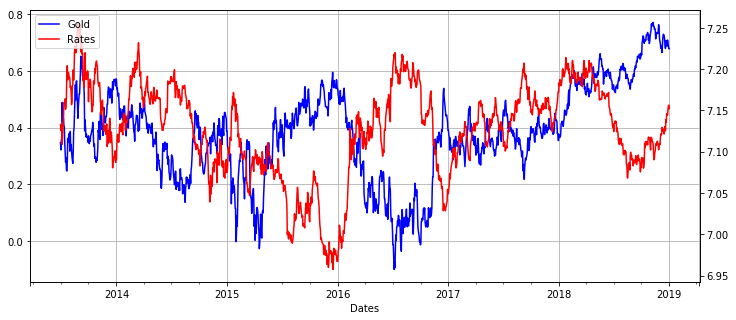

In [323]:
_pval = ts.coint(df_filtered['GTII10'], df_filtered['GOLDS'])[1]
handle = 'Start Date: ' + str(date_1) + ' End Date: ' + str(date_2) + ' P-Value: ' + "{0:.4f}".format(round(_pval,2))

print(handle)
plt.figure(figsize=(12,5))

ax1 = df_filtered.GTII10.plot(color='blue', grid=True, label='Gold')
ax2 = df_filtered.GOLDS.plot(color='red', grid=True, secondary_y=True, label='Rates')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.savefig(date_1 + ' - ' + date_2 + ' - ' + 'P-Value ' + "{0:.4f}".format(round(_pval,2)) + '.jpg')
plt.show()

In [324]:
print(ts.coint(df_filtered['GTII10'], df_filtered['GOLDS'])[1])

0.6220295478528245


#### Calculate the coefficients for the past 60 days for the entire series

In [417]:
n_days = 1440
coefficients = []
dates = []
_pvals = []
for i in range(n_days, len(df.index)):
    X = df['GTII10'].loc[df.index[i] - timedelta(days=n_days):df.index[i]]
    Y = df['GOLDS'].loc[df.index[i] - timedelta(days=n_days):df.index[i]]
    #print(X)
    #print(Y)
    _pvals.append(ts.coint(X, Y)[1])
    regr = LinearRegression()
    regr.fit(X.values.reshape(-1,1), Y.values.reshape(-1,1))
    print(df.index[i], regr.coef_[0][0])
    coefficients.append(regr.coef_[0][0])
    dates.append(df.index[i])

2002-08-08 00:00:00 -0.14597431348129933
2002-08-09 00:00:00 -0.14851841957974501
2002-08-12 00:00:00 -0.1509425176601072
2002-08-13 00:00:00 -0.1536048759597029
2002-08-14 00:00:00 -0.15576503541323014
2002-08-15 00:00:00 -0.15823983956567195
2002-08-16 00:00:00 -0.160453638942787
2002-08-19 00:00:00 -0.16198931533250432
2002-08-20 00:00:00 -0.1636525528270064
2002-08-21 00:00:00 -0.16507985683949558
2002-08-22 00:00:00 -0.16638471335682653
2002-08-23 00:00:00 -0.16765547111045345
2002-08-26 00:00:00 -0.16916501293369623
2002-08-27 00:00:00 -0.17099731509420102
2002-08-28 00:00:00 -0.17251750232092522
2002-08-29 00:00:00 -0.1743642448909395
2002-08-30 00:00:00 -0.17608079161385096
2002-09-02 00:00:00 -0.1777100234536399
2002-09-03 00:00:00 -0.17947376037409077
2002-09-04 00:00:00 -0.181237280382685
2002-09-05 00:00:00 -0.183440899920619
2002-09-06 00:00:00 -0.18574833837658153
2002-09-09 00:00:00 -0.18808633509601988
2002-09-10 00:00:00 -0.1899343757183805
2002-09-11 00:00:00 -0.19168

2003-05-20 00:00:00 -0.3929774587439492
2003-05-21 00:00:00 -0.3936094969772693
2003-05-22 00:00:00 -0.39403576109007754
2003-05-23 00:00:00 -0.3947897236885667
2003-05-26 00:00:00 -0.39510434597451777
2003-05-27 00:00:00 -0.3955789490184162
2003-05-28 00:00:00 -0.3960329985263443
2003-05-29 00:00:00 -0.39655757082190896
2003-05-30 00:00:00 -0.39713982447366314
2003-06-02 00:00:00 -0.3973238074465581
2003-06-03 00:00:00 -0.3976527433500429
2003-06-04 00:00:00 -0.39775784670909803
2003-06-05 00:00:00 -0.39818020853274744
2003-06-06 00:00:00 -0.3986375078327324
2003-06-09 00:00:00 -0.3984131627352036
2003-06-10 00:00:00 -0.39785505467034704
2003-06-11 00:00:00 -0.3975125786890396
2003-06-12 00:00:00 -0.39693031862872025
2003-06-13 00:00:00 -0.3965340063791832
2003-06-16 00:00:00 -0.3959531459685844
2003-06-17 00:00:00 -0.3960081071221782
2003-06-18 00:00:00 -0.3959621906290408
2003-06-19 00:00:00 -0.39599241791435785
2003-06-20 00:00:00 -0.3961943188593634
2003-06-23 00:00:00 -0.39552170

2004-03-01 00:00:00 -0.5989861693099859
2004-03-02 00:00:00 -0.5996133475958101
2004-03-03 00:00:00 -0.6001867405865667
2004-03-04 00:00:00 -0.6007545521044664
2004-03-05 00:00:00 -0.6006356546878889
2004-03-08 00:00:00 -0.6013057628072243
2004-03-09 00:00:00 -0.6013911720755739
2004-03-10 00:00:00 -0.6015072194751112
2004-03-11 00:00:00 -0.6017864807510931
2004-03-12 00:00:00 -0.6016433067814532
2004-03-15 00:00:00 -0.6022517467914934
2004-03-16 00:00:00 -0.602341782707131
2004-03-17 00:00:00 -0.6024074741530709
2004-03-18 00:00:00 -0.6026399648137853
2004-03-19 00:00:00 -0.6027288760242472
2004-03-22 00:00:00 -0.6036971352206526
2004-03-23 00:00:00 -0.6043247069401096
2004-03-24 00:00:00 -0.6047670199050208
2004-03-25 00:00:00 -0.6052727231457548
2004-03-26 00:00:00 -0.6056518458368839
2004-03-29 00:00:00 -0.6067553416864135
2004-03-30 00:00:00 -0.6075438810648003
2004-03-31 00:00:00 -0.6083742499478294
2004-04-01 00:00:00 -0.6091802219906032
2004-04-02 00:00:00 -0.6098388986828642
2

2004-12-17 00:00:00 -0.7723985556124277
2004-12-20 00:00:00 -0.7725913757077482
2004-12-21 00:00:00 -0.772799573817985
2004-12-22 00:00:00 -0.7730367820993361
2004-12-23 00:00:00 -0.7733520021720295
2004-12-24 00:00:00 -0.7737976526294835
2004-12-27 00:00:00 -0.7740457400896679
2004-12-28 00:00:00 -0.7744414044609268
2004-12-29 00:00:00 -0.7747669164718329
2004-12-30 00:00:00 -0.7750559863899621
2004-12-31 00:00:00 -0.775493073082872
2005-01-03 00:00:00 -0.7755976394073713
2005-01-04 00:00:00 -0.7758153925799073
2005-01-05 00:00:00 -0.7760541199708834
2005-01-06 00:00:00 -0.7761584947394233
2005-01-07 00:00:00 -0.7764490944173836
2005-01-10 00:00:00 -0.7765027292456131
2005-01-11 00:00:00 -0.7766496430581372
2005-01-12 00:00:00 -0.7768438888102878
2005-01-13 00:00:00 -0.7769415674714182
2005-01-14 00:00:00 -0.7772620056932298
2005-01-17 00:00:00 -0.7770968603719355
2005-01-18 00:00:00 -0.777097270452932
2005-01-19 00:00:00 -0.7770128931047852
2005-01-20 00:00:00 -0.7769073478053579
200

2005-10-10 00:00:00 -0.7529087471531608
2005-10-11 00:00:00 -0.75264051232073
2005-10-12 00:00:00 -0.7522225225683588
2005-10-13 00:00:00 -0.7518742640806299
2005-10-14 00:00:00 -0.7522652514059592
2005-10-17 00:00:00 -0.7511361979437574
2005-10-18 00:00:00 -0.7508119809282872
2005-10-19 00:00:00 -0.750270098332208
2005-10-20 00:00:00 -0.7498272165697702
2005-10-21 00:00:00 -0.7503036221691991
2005-10-24 00:00:00 -0.748979963988278
2005-10-25 00:00:00 -0.7484652916925507
2005-10-26 00:00:00 -0.7478961362341848
2005-10-27 00:00:00 -0.7475569263151008
2005-10-28 00:00:00 -0.747835088237699
2005-10-31 00:00:00 -0.7466476356735228
2005-11-01 00:00:00 -0.7463305763457216
2005-11-02 00:00:00 -0.7459401213404268
2005-11-03 00:00:00 -0.7454787998179921
2005-11-04 00:00:00 -0.7456117915733984
2005-11-07 00:00:00 -0.7447055456939748
2005-11-08 00:00:00 -0.7444673944379923
2005-11-09 00:00:00 -0.7439589364462166
2005-11-10 00:00:00 -0.7435111655318025
2005-11-11 00:00:00 -0.7436379845194755
2005-

2006-07-25 00:00:00 0.14116280993005584
2006-07-26 00:00:00 0.15145305976705198
2006-07-27 00:00:00 0.16285215465795308
2006-07-28 00:00:00 0.16842582534735853
2006-07-31 00:00:00 0.1849782579381728
2006-08-01 00:00:00 0.19584045598454838
2006-08-02 00:00:00 0.20701925874961655
2006-08-03 00:00:00 0.21790872341252546
2006-08-04 00:00:00 0.22220714656720575
2006-08-07 00:00:00 0.23795590279070516
2006-08-08 00:00:00 0.24767883932531792
2006-08-09 00:00:00 0.2569196180764906
2006-08-10 00:00:00 0.2660940026196041
2006-08-11 00:00:00 0.2705726488495377
2006-08-14 00:00:00 0.28414776728643615
2006-08-15 00:00:00 0.29200259655871447
2006-08-16 00:00:00 0.2989720522002227
2006-08-17 00:00:00 0.30611295111644016
2006-08-18 00:00:00 0.3095155264527884
2006-08-21 00:00:00 0.320135675683398
2006-08-22 00:00:00 0.32715414657405295
2006-08-23 00:00:00 0.334067760336503
2006-08-24 00:00:00 0.3409229040460675
2006-08-25 00:00:00 0.3441233420910838
2006-08-28 00:00:00 0.353738051227169
2006-08-29 00:

2007-05-23 00:00:00 1.3621240832379578
2007-05-24 00:00:00 1.3639242962672158
2007-05-25 00:00:00 1.3656592786647024
2007-05-28 00:00:00 1.3656007058957171
2007-05-29 00:00:00 1.36560504895527
2007-05-30 00:00:00 1.365753574895286
2007-05-31 00:00:00 1.3658908486408465
2007-06-01 00:00:00 1.367717641394403
2007-06-04 00:00:00 1.3661334584224163
2007-06-05 00:00:00 1.3658024048683741
2007-06-06 00:00:00 1.365655499310373
2007-06-07 00:00:00 1.364620314525933
2007-06-08 00:00:00 1.365027441505596
2007-06-11 00:00:00 1.3621295730106016
2007-06-12 00:00:00 1.3599654770774448
2007-06-13 00:00:00 1.3592893249581361
2007-06-14 00:00:00 1.3584370787928177
2007-06-15 00:00:00 1.3587405520337295
2007-06-18 00:00:00 1.358710463970278
2007-06-19 00:00:00 1.3586429412530414
2007-06-20 00:00:00 1.358067733659902
2007-06-21 00:00:00 1.3568105498600314
2007-06-22 00:00:00 1.3573831018541282
2007-06-25 00:00:00 1.3576111454441495
2007-06-26 00:00:00 1.3580938994266778
2007-06-27 00:00:00 1.358579718141

2008-03-18 00:00:00 0.3981217043464782
2008-03-19 00:00:00 0.37727983638548074
2008-03-20 00:00:00 0.358212128132697
2008-03-21 00:00:00 0.3405983391755697
2008-03-24 00:00:00 0.32663053216485505
2008-03-25 00:00:00 0.3139828488318206
2008-03-26 00:00:00 0.2999201476558436
2008-03-27 00:00:00 0.28564844260858807
2008-03-28 00:00:00 0.271308569157577
2008-03-31 00:00:00 0.25579298508670684
2008-04-01 00:00:00 0.24464698945342198
2008-04-02 00:00:00 0.23348582206446866
2008-04-03 00:00:00 0.22381164154604538
2008-04-04 00:00:00 0.21225893056580122
2008-04-07 00:00:00 0.2012480038849133
2008-04-08 00:00:00 0.19206815041699699
2008-04-09 00:00:00 0.18185283243748868
2008-04-10 00:00:00 0.17229441509375593
2008-04-11 00:00:00 0.160974065425764
2008-04-14 00:00:00 0.15155128186385858
2008-04-15 00:00:00 0.14252880541296975
2008-04-16 00:00:00 0.1348370505832057
2008-04-17 00:00:00 0.12934224466226255
2008-04-18 00:00:00 0.12207342972192317
2008-04-21 00:00:00 0.1184914874947839
2008-04-22 00

2008-12-26 00:00:00 -0.25577757635327647
2008-12-29 00:00:00 -0.2602759298846289
2008-12-30 00:00:00 -0.26288877176154524
2008-12-31 00:00:00 -0.2645973263849885
2009-01-01 00:00:00 -0.26656709266236417
2009-01-02 00:00:00 -0.2655942571110729
2009-01-05 00:00:00 -0.26835998425045304
2009-01-06 00:00:00 -0.26992504653857
2009-01-07 00:00:00 -0.27217611309028195
2009-01-08 00:00:00 -0.27534076942950303
2009-01-09 00:00:00 -0.2762075565104359
2009-01-12 00:00:00 -0.2826460927577017
2009-01-13 00:00:00 -0.28619966162612986
2009-01-14 00:00:00 -0.28931489366642876
2009-01-15 00:00:00 -0.293069582345466
2009-01-16 00:00:00 -0.29396632994307886
2009-01-19 00:00:00 -0.3019182513495858
2009-01-20 00:00:00 -0.307372832181889
2009-01-21 00:00:00 -0.3113098399337285
2009-01-22 00:00:00 -0.31513636971144793
2009-01-23 00:00:00 -0.31573631467064434
2009-01-26 00:00:00 -0.32358234636027944
2009-01-27 00:00:00 -0.3279189053402286
2009-01-28 00:00:00 -0.3319445573765166
2009-01-29 00:00:00 -0.335549654

2009-10-13 00:00:00 -0.9302462890809409
2009-10-14 00:00:00 -0.9315233844996677
2009-10-15 00:00:00 -0.9325454059828437
2009-10-16 00:00:00 -0.9339671378951332
2009-10-19 00:00:00 -0.9351330296201117
2009-10-20 00:00:00 -0.9358680793806994
2009-10-21 00:00:00 -0.9368141137853505
2009-10-22 00:00:00 -0.9378232362312526
2009-10-23 00:00:00 -0.9392260794180788
2009-10-26 00:00:00 -0.9386702288664335
2009-10-27 00:00:00 -0.9395716891859419
2009-10-28 00:00:00 -0.9403597589758924
2009-10-29 00:00:00 -0.9411047840113334
2009-10-30 00:00:00 -0.9422596512422682
2009-11-02 00:00:00 -0.942813389616243
2009-11-03 00:00:00 -0.943840564332886
2009-11-04 00:00:00 -0.9449129850700736
2009-11-05 00:00:00 -0.9460697600444067
2009-11-06 00:00:00 -0.9475768549946444
2009-11-09 00:00:00 -0.9480543310678909
2009-11-10 00:00:00 -0.9487720959298519
2009-11-11 00:00:00 -0.9495035041605695
2009-11-12 00:00:00 -0.9501191991781139
2009-11-13 00:00:00 -0.9516490540057687
2009-11-16 00:00:00 -0.9515703354884136
20

2010-07-30 00:00:00 -1.051979254491372
2010-08-02 00:00:00 -1.0507221732979157
2010-08-03 00:00:00 -1.0499688887452574
2010-08-04 00:00:00 -1.0494912126102882
2010-08-05 00:00:00 -1.0487611124131568
2010-08-06 00:00:00 -1.048744637344896
2010-08-09 00:00:00 -1.0469597910114623
2010-08-10 00:00:00 -1.0456071845177204
2010-08-11 00:00:00 -1.0441814251444326
2010-08-12 00:00:00 -1.0434984364609952
2010-08-13 00:00:00 -1.0433979274674585
2010-08-16 00:00:00 -1.0415473016210335
2010-08-17 00:00:00 -1.0407985981927192
2010-08-18 00:00:00 -1.0400608976305048
2010-08-19 00:00:00 -1.0392906812616476
2010-08-20 00:00:00 -1.0395195382332345
2010-08-23 00:00:00 -1.0374790754296297
2010-08-24 00:00:00 -1.0363681983492405
2010-08-25 00:00:00 -1.035139647242386
2010-08-26 00:00:00 -1.0335164478593997
2010-08-27 00:00:00 -1.0338405031933058
2010-08-30 00:00:00 -1.0313046666087489
2010-08-31 00:00:00 -1.0298708577426177
2010-09-01 00:00:00 -1.0289124552100284
2010-09-02 00:00:00 -1.028130487067961
2010

2011-05-18 00:00:00 -0.8901167775751586
2011-05-19 00:00:00 -0.8903139218141786
2011-05-20 00:00:00 -0.8911941778432992
2011-05-23 00:00:00 -0.8911043795101384
2011-05-24 00:00:00 -0.8914259973422338
2011-05-25 00:00:00 -0.8918067474409853
2011-05-26 00:00:00 -0.892052692086346
2011-05-27 00:00:00 -0.8929151696505283
2011-05-30 00:00:00 -0.8927453045399965
2011-05-31 00:00:00 -0.8931138289822892
2011-06-01 00:00:00 -0.8932871391060307
2011-06-02 00:00:00 -0.8934674491848923
2011-06-03 00:00:00 -0.8941769886450918
2011-06-06 00:00:00 -0.893469061282663
2011-06-07 00:00:00 -0.8934763089103225
2011-06-08 00:00:00 -0.8934841302613252
2011-06-09 00:00:00 -0.8935555961745499
2011-06-10 00:00:00 -0.8943137193527603
2011-06-13 00:00:00 -0.8936418965851259
2011-06-14 00:00:00 -0.8938214791638006
2011-06-15 00:00:00 -0.8938668640986548
2011-06-16 00:00:00 -0.8940175486845814
2011-06-17 00:00:00 -0.894750054652754
2011-06-20 00:00:00 -0.8945098664570059
2011-06-21 00:00:00 -0.8948219356325038
201

2012-03-07 00:00:00 -0.5784854598005122
2012-03-08 00:00:00 -0.5772313282161216
2012-03-09 00:00:00 -0.5759413300616504
2012-03-12 00:00:00 -0.5744777763104294
2012-03-13 00:00:00 -0.5732544699594364
2012-03-14 00:00:00 -0.5724829660086037
2012-03-15 00:00:00 -0.571775948020504
2012-03-16 00:00:00 -0.571145304953634
2012-03-19 00:00:00 -0.5705421468550564
2012-03-20 00:00:00 -0.5699687181036667
2012-03-21 00:00:00 -0.5692666923721736
2012-03-22 00:00:00 -0.5685945080882784
2012-03-23 00:00:00 -0.5678860302489771
2012-03-26 00:00:00 -0.5672071499167781
2012-03-27 00:00:00 -0.5664197914873208
2012-03-28 00:00:00 -0.5656485805769931
2012-03-29 00:00:00 -0.5647386842525695
2012-03-30 00:00:00 -0.5641387487927794
2012-04-02 00:00:00 -0.5630107942109
2012-04-03 00:00:00 -0.562412148081974
2012-04-04 00:00:00 -0.5616459300675887
2012-04-05 00:00:00 -0.5608347590978775
2012-04-06 00:00:00 -0.559920611317398
2012-04-09 00:00:00 -0.5585796109582702
2012-04-10 00:00:00 -0.5571199858192806
2012-04

2012-12-24 00:00:00 -0.22059124755074408
2012-12-25 00:00:00 -0.21981786287710403
2012-12-26 00:00:00 -0.21893259881903998
2012-12-27 00:00:00 -0.2181096955738012
2012-12-28 00:00:00 -0.21756982465187047
2012-12-31 00:00:00 -0.21655661930553755
2013-01-01 00:00:00 -0.21588683156207597
2013-01-02 00:00:00 -0.21536431716195667
2013-01-03 00:00:00 -0.2150048366113247
2013-01-04 00:00:00 -0.21488786097997703
2013-01-07 00:00:00 -0.21415471027934352
2013-01-08 00:00:00 -0.21366763949621626
2013-01-09 00:00:00 -0.21315193052189987
2013-01-10 00:00:00 -0.2127499904547676
2013-01-11 00:00:00 -0.21254122048742385
2013-01-14 00:00:00 -0.2117251088521035
2013-01-15 00:00:00 -0.21116740091089467
2013-01-16 00:00:00 -0.21064119074005336
2013-01-17 00:00:00 -0.21019740800197748
2013-01-18 00:00:00 -0.20992603518858036
2013-01-21 00:00:00 -0.2091357690709849
2013-01-22 00:00:00 -0.2086677586416413
2013-01-23 00:00:00 -0.20815691253115876
2013-01-24 00:00:00 -0.20762361672646187
2013-01-25 00:00:00 -0

2013-10-02 00:00:00 -0.1395279534325089
2013-10-03 00:00:00 -0.13928912488572412
2013-10-04 00:00:00 -0.13931676844160498
2013-10-07 00:00:00 -0.13876633784708872
2013-10-08 00:00:00 -0.13849094216493357
2013-10-09 00:00:00 -0.13824397407210992
2013-10-10 00:00:00 -0.13800760986229155
2013-10-11 00:00:00 -0.13805335867744647
2013-10-14 00:00:00 -0.1376103269958967
2013-10-15 00:00:00 -0.13743164163202468
2013-10-16 00:00:00 -0.1372506912196086
2013-10-17 00:00:00 -0.13705945053914736
2013-10-18 00:00:00 -0.13708626532886276
2013-10-21 00:00:00 -0.13670620067648417
2013-10-22 00:00:00 -0.13653396162061854
2013-10-23 00:00:00 -0.1363474377226235
2013-10-24 00:00:00 -0.13617345075449042
2013-10-25 00:00:00 -0.13618872807230725
2013-10-28 00:00:00 -0.13587292743766846
2013-10-29 00:00:00 -0.13572949424184907
2013-10-30 00:00:00 -0.13558529479734616
2013-10-31 00:00:00 -0.1354541762631062
2013-11-01 00:00:00 -0.13548301691926515
2013-11-04 00:00:00 -0.1352343576770322
2013-11-05 00:00:00 -0

2014-07-15 00:00:00 -0.11016751671046458
2014-07-16 00:00:00 -0.11003472826941653
2014-07-17 00:00:00 -0.10990004981965859
2014-07-18 00:00:00 -0.10994669141025602
2014-07-21 00:00:00 -0.1096364094932792
2014-07-22 00:00:00 -0.1095024684003416
2014-07-23 00:00:00 -0.1093839888913365
2014-07-24 00:00:00 -0.10927345974999278
2014-07-25 00:00:00 -0.10931849466120187
2014-07-28 00:00:00 -0.10906143408031355
2014-07-29 00:00:00 -0.10895989473540715
2014-07-30 00:00:00 -0.10887259911540491
2014-07-31 00:00:00 -0.10878630791402066
2014-08-01 00:00:00 -0.10884262115390346
2014-08-04 00:00:00 -0.1085980721189396
2014-08-05 00:00:00 -0.10851910822161852
2014-08-06 00:00:00 -0.10843029695557337
2014-08-07 00:00:00 -0.10833084942781522
2014-08-08 00:00:00 -0.10837444054097287
2014-08-11 00:00:00 -0.1081460965550646
2014-08-12 00:00:00 -0.10805916468334559
2014-08-13 00:00:00 -0.10797529113344637
2014-08-14 00:00:00 -0.10788460366667074
2014-08-15 00:00:00 -0.10792611646664563
2014-08-18 00:00:00 -

2015-04-22 00:00:00 -0.13517029634410133
2015-04-23 00:00:00 -0.1354229276216661
2015-04-24 00:00:00 -0.13548009138248387
2015-04-27 00:00:00 -0.13589974349229042
2015-04-28 00:00:00 -0.13617090210584515
2015-04-29 00:00:00 -0.13645584077944606
2015-04-30 00:00:00 -0.13676379440448921
2015-05-01 00:00:00 -0.13686821573914346
2015-05-04 00:00:00 -0.1374318101617152
2015-05-05 00:00:00 -0.13777356438237845
2015-05-06 00:00:00 -0.13811104337958865
2015-05-07 00:00:00 -0.13847156689508908
2015-05-08 00:00:00 -0.1385889423671079
2015-05-11 00:00:00 -0.13920887717333646
2015-05-12 00:00:00 -0.13955690467241597
2015-05-13 00:00:00 -0.13989771250602595
2015-05-14 00:00:00 -0.14022901485892336
2015-05-15 00:00:00 -0.14032430286420922
2015-05-18 00:00:00 -0.1408897519831644
2015-05-19 00:00:00 -0.1412292902406073
2015-05-20 00:00:00 -0.14158364621606798
2015-05-21 00:00:00 -0.14192875499556243
2015-05-22 00:00:00 -0.1420386777666112
2015-05-25 00:00:00 -0.14261523004078824
2015-05-26 00:00:00 -0

2016-01-29 00:00:00 -0.18386594764115247
2016-02-01 00:00:00 -0.18375249553047504
2016-02-02 00:00:00 -0.18370081225266713
2016-02-03 00:00:00 -0.18363220401373623
2016-02-04 00:00:00 -0.18355646582619478
2016-02-05 00:00:00 -0.18360202080474936
2016-02-08 00:00:00 -0.18333339719932332
2016-02-09 00:00:00 -0.18325755624045945
2016-02-10 00:00:00 -0.1831892443678812
2016-02-11 00:00:00 -0.18308109096471523
2016-02-12 00:00:00 -0.18307761929987876
2016-02-15 00:00:00 -0.18293981586933591
2016-02-16 00:00:00 -0.18287619158176485
2016-02-17 00:00:00 -0.18280162983412068
2016-02-18 00:00:00 -0.18270001658934448
2016-02-19 00:00:00 -0.18270494403432316
2016-02-22 00:00:00 -0.18255501296466842
2016-02-23 00:00:00 -0.18254436807401506
2016-02-24 00:00:00 -0.18252961251062427
2016-02-25 00:00:00 -0.1825138836759951
2016-02-26 00:00:00 -0.18253176164095195
2016-02-29 00:00:00 -0.1825299872115201
2016-03-01 00:00:00 -0.1825190528636986
2016-03-02 00:00:00 -0.1825051883527747
2016-03-03 00:00:00 -

2016-11-11 00:00:00 -0.1685689332351107
2016-11-14 00:00:00 -0.16990761984872893
2016-11-15 00:00:00 -0.17125578962156593
2016-11-16 00:00:00 -0.17308021233759818
2016-11-17 00:00:00 -0.17472008779546458
2016-11-18 00:00:00 -0.1747354723985741
2016-11-21 00:00:00 -0.1778801311157311
2016-11-22 00:00:00 -0.17842303897092143
2016-11-23 00:00:00 -0.1786058037918949
2016-11-24 00:00:00 -0.17889465377071448
2016-11-25 00:00:00 -0.17892878926025285
2016-11-28 00:00:00 -0.17880402201831125
2016-11-29 00:00:00 -0.1787977250669861
2016-11-30 00:00:00 -0.17891064537789617
2016-12-01 00:00:00 -0.1791649161393647
2016-12-02 00:00:00 -0.17920502942281424
2016-12-05 00:00:00 -0.17940806594006206
2016-12-06 00:00:00 -0.1797631608959821
2016-12-07 00:00:00 -0.18006724505049349
2016-12-08 00:00:00 -0.1805437863054639
2016-12-09 00:00:00 -0.1806012680990359
2016-12-12 00:00:00 -0.18063140069229733
2016-12-13 00:00:00 -0.1803773325272929
2016-12-14 00:00:00 -0.18001234101854938
2016-12-15 00:00:00 -0.179

2017-08-24 00:00:00 -0.2202280406278562
2017-08-25 00:00:00 -0.22017162510336635
2017-08-28 00:00:00 -0.2224082089956634
2017-08-29 00:00:00 -0.22279854368960614
2017-08-30 00:00:00 -0.22348334838177764
2017-08-31 00:00:00 -0.22392030735787669
2017-09-01 00:00:00 -0.22394188048883412
2017-09-04 00:00:00 -0.22437681836883452
2017-09-05 00:00:00 -0.22482644045691055
2017-09-06 00:00:00 -0.22520062904316862
2017-09-07 00:00:00 -0.22575836974938995
2017-09-08 00:00:00 -0.22610578218059355
2017-09-11 00:00:00 -0.22654452489846935
2017-09-12 00:00:00 -0.22677631019515732
2017-09-13 00:00:00 -0.22695312158110262
2017-09-14 00:00:00 -0.22721512348542328
2017-09-15 00:00:00 -0.2273019719606324
2017-09-18 00:00:00 -0.22768290815272382
2017-09-19 00:00:00 -0.2279005702090545
2017-09-20 00:00:00 -0.22800471583963702
2017-09-21 00:00:00 -0.22805432837839326
2017-09-22 00:00:00 -0.22801740558750277
2017-09-25 00:00:00 -0.22850409494069404
2017-09-26 00:00:00 -0.22868373211013088
2017-09-27 00:00:00 

2018-06-01 00:00:00 -0.13604169083283804
2018-06-04 00:00:00 -0.13480121520467322
2018-06-05 00:00:00 -0.13368182029760595
2018-06-06 00:00:00 -0.13248453675298952
2018-06-07 00:00:00 -0.13138494970864797
2018-06-08 00:00:00 -0.13041692973253324
2018-06-11 00:00:00 -0.12899360495680295
2018-06-12 00:00:00 -0.12796233358914616
2018-06-13 00:00:00 -0.1268817185863627
2018-06-14 00:00:00 -0.12585264133353535
2018-06-15 00:00:00 -0.1251533587042404
2018-06-18 00:00:00 -0.1241474030835328
2018-06-19 00:00:00 -0.12326441346040497
2018-06-20 00:00:00 -0.12230649146076047
2018-06-21 00:00:00 -0.12137499641616589
2018-06-22 00:00:00 -0.12084302883667414
2018-06-25 00:00:00 -0.12000207799845701
2018-06-26 00:00:00 -0.11941793897380502
2018-06-27 00:00:00 -0.11879184794517
2018-06-28 00:00:00 -0.11823234038500799
2018-06-29 00:00:00 -0.11787819304542355
2018-07-02 00:00:00 -0.11709151376921736
2018-07-03 00:00:00 -0.11656760552018779
2018-07-04 00:00:00 -0.11608436245741285
2018-07-05 00:00:00 -0

In [415]:
df_coef = pd.DataFrame({'coefficients':coefficients, 'pvalues': _pvals}, index=dates)
df_coef.head()

,coefficients,pvalues
1998-06-18,-1.203807,0.671133
1998-06-19,-1.204662,0.690561
1998-06-22,-1.217126,0.739948
1998-06-23,-1.222686,0.720345
1998-06-24,-1.228007,0.717062


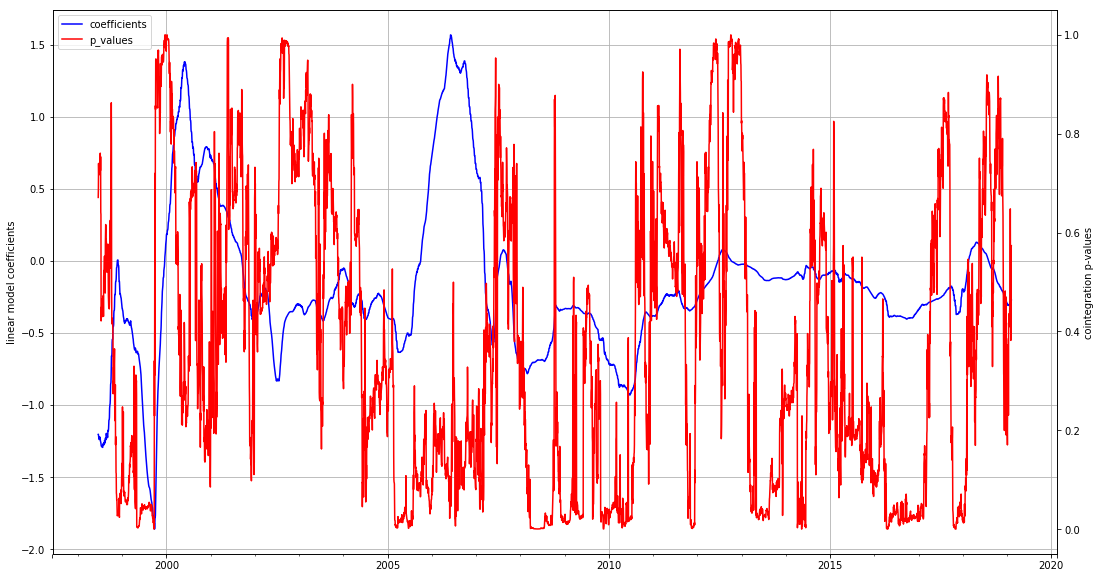

In [416]:
plt.figure(figsize=(18,10))

ax_coef = df_coef.coefficients.plot(color='blue', grid=True, label='coefficients')
ax_pval = df_coef.pvalues.plot(color='red', grid=True, secondary_y=True, label='p_values')

h1, l1 = ax_coef.get_legend_handles_labels()
h2, l2 = ax_pval.get_legend_handles_labels()

ax_coef.set_ylabel('linear model coefficients')
ax_pval.set_ylabel('cointegration p-values')


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

#### Step 5: Print the Z-Score series graph for each pair of co-integrated pairs

In [325]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [383]:
ratios = (df_filtered['GOLDS'] - df_filtered['GTII10'])**2
z_score = zscore(ratios)

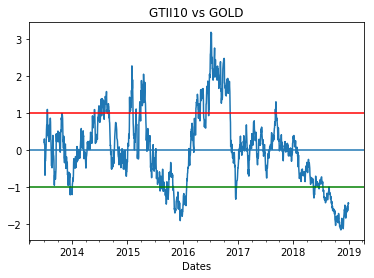

In [384]:
header = str('GTII10 vs GOLD')

z_score.plot()
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.title(header)
plt.show()

#### Step 4: Feature Engineering for Cointegration

Let’s start using the following features:

* Split our data into train/test split
* 60 day Moving Average of Ratio: Measure of rolling mean
* 5 day Moving Average of Ratio: Measure of current value of mean
* 60 day Standard Deviation
* z score: (5d MA — 60d MA) /60d SD

##### Plot the features

In [385]:
length = len(ratios)

train = ratios[:round(1*length)]
test = ratios[round(1*length):]

In [386]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60

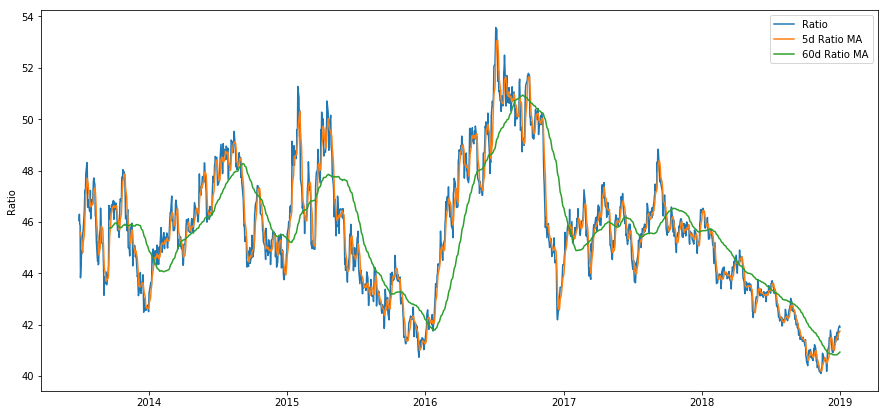

In [387]:
plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])
plt.ylabel('Ratio')
plt.show()

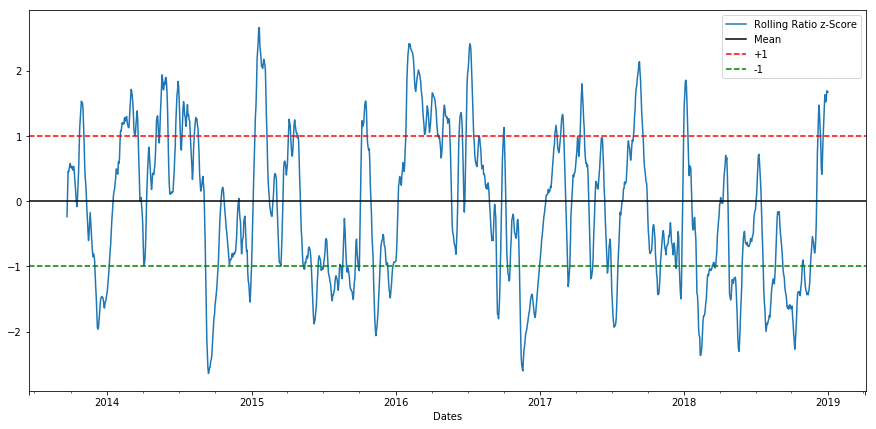

In [388]:
plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

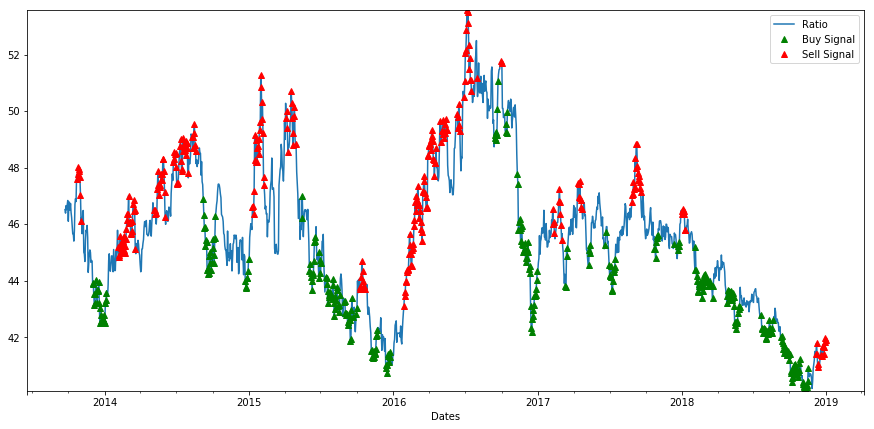

In [389]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))

train[60:].plot()

buy = train.copy()
sell = train.copy()

buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0

buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,train.min(),train.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

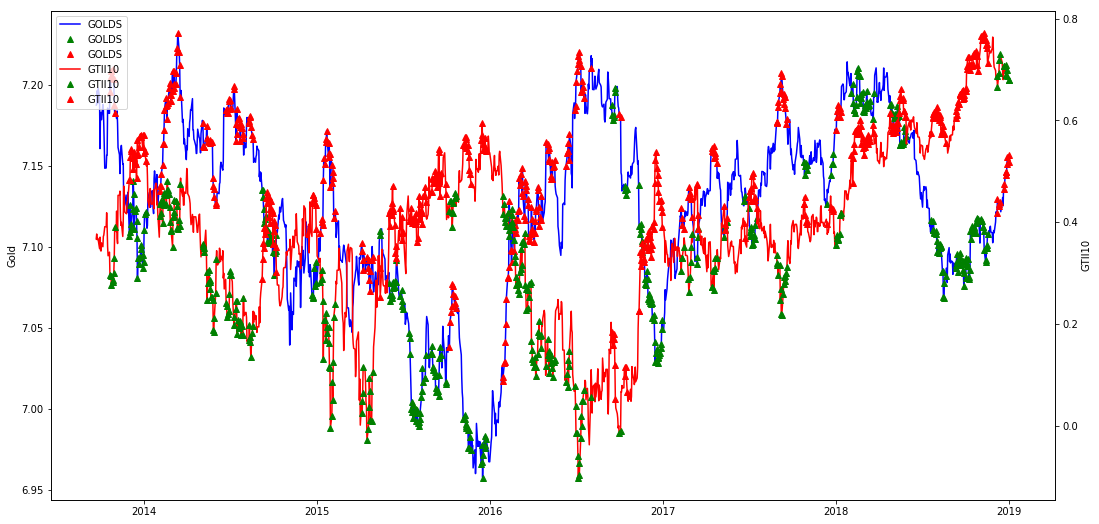

In [390]:
# Plot the prices and buy and sell signals from z score

S1 = df_filtered['GOLDS'].iloc[:round(1*length)]
S2 = df_filtered['GTII10'].iloc[:round(1*length)]

buy_gold = np.nan*S1.copy()
sell_gold = np.nan*S1.copy()

buy_rates = np.nan*S2.copy()
sell_rates = np.nan*S2.copy()

#Buy/sell Gold
buy_gold[buy!=0] = S1[buy!=0]
sell_gold[sell!=0] = S1[sell!=0]

#Buy/sell Rates
buy_rates[sell!=0] = S2[sell!=0]
sell_rates[buy!=0] = S2[buy!=0]

fig = plt.figure(figsize=(18,9))

ax1 = fig.add_subplot(111)
ax1.plot(S1[60:], 'b')
ax1.plot(buy_gold[60:], color='g', linestyle='None', marker='^')
ax1.plot(sell_gold[60:], color='r', linestyle='None', marker='^')
ax1.set_ylabel('Gold')

ax2 = ax1.twinx()
ax2.plot(S2[60:], 'r')
ax2.plot(buy_rates[60:], color='g', linestyle='None', marker='^')
ax2.plot(sell_rates[60:], color='r', linestyle='None', marker='^')
ax2.set_ylabel('GTII10')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2) 
plt.show()

In [393]:
print('S2: ', ts.adfuller(S1)[1])
print('S1: ', ts.adfuller(S2)[1])
print('Difference: ', ts.adfuller(train)[1])

S2:  0.0536998650439836
S1:  0.25559305376261177
Difference:  0.023294028729780335


In [394]:
adf = ADF(S1)
print('S1 : ', adf.summary().as_text(), '\n')

adf = ADF(S2)
print('S2 : ', adf.summary().as_text(), '\n')

adf = ADF(train)
print('Combination: ', adf.summary().as_text())

S1 :     Augmented Dickey-Fuller Results   
Test Statistic                 -2.833
P-value                         0.054
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 

S2 :     Augmented Dickey-Fuller Results   
Test Statistic                 -2.073
P-value                         0.256
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 

Combination:     Augmented Dickey-Fuller Results   
Test Statistic                 -3.147
P-value                         0.023
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1